In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

### A quantum circuit with 8 qubits and 8 outputs

In [2]:
n = 8
n_q = n
n_b = n # The number of output buts we will extract from the circuit at the end of the computation.
qc_output = QuantumCircuit(n_q, n_b)

In [3]:
# Add a measure operation to each qubit.
for j in range(n):
    qc_output.measure(j, j)

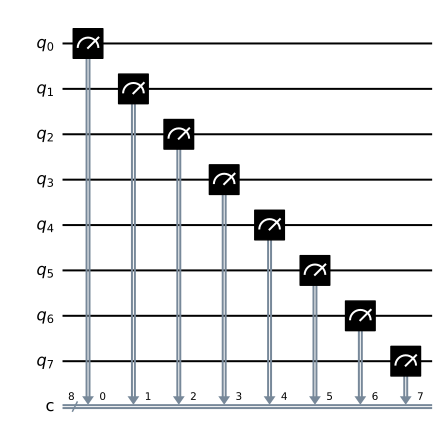

In [4]:
# Draw the quantum circuit.
qc_output.draw()

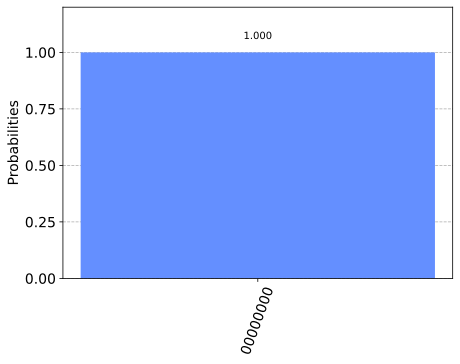

In [5]:
# Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always 00000000: a 0 from each qubit.

# Run the circuit using the execute function.
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# To run on a real device you simply need to replace Aer.get_backend('qasm_simulator') with the backend object of the device you want to use.

### Encoding an input

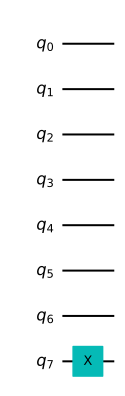

In [6]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7) # Apply a NOT gat to qubit 7.
qc_encode.draw()

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_2156\657754831.py:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output


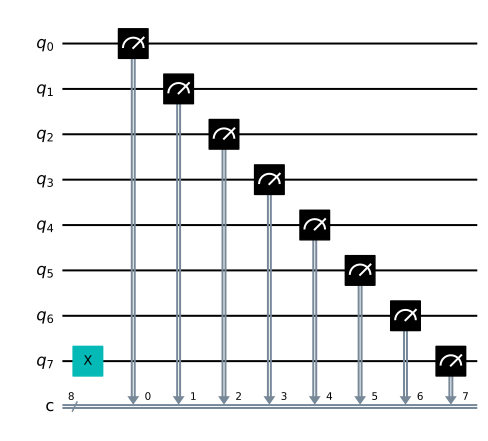

In [7]:
# Extracting results can be done using the circuit we have from before: qc_output. Adding the two circuits using qc_encode + qc_output creates a new circuit with everything needed to extract an output added at the end.

qc = qc_encode + qc_output
qc.draw()

In [8]:
# Measure the outputs

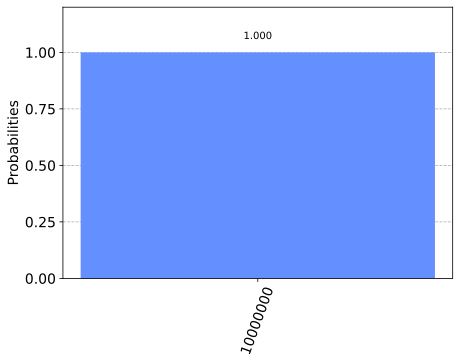

In [9]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# Important: Qiskit numbers the bits in a string from right to left. So q0 is right-most digit in the string.

### Design a half-adder circuit

In [10]:
# if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent): 0 + 0, 0 + 1, 1 + 0, 1 + 1.
# This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.

#Let's try to do 1 + 1.

# In quantum computers, the job of the XOR gate is done by the controlled-NOT gate or CNOT

#### A quantum circuit with a CNOT gate

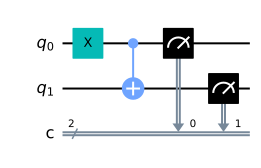

In [11]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

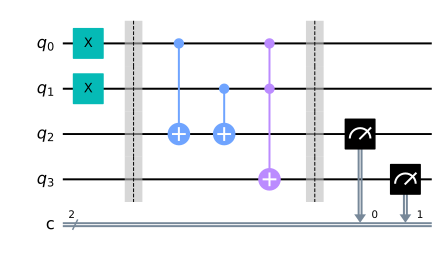

In [12]:
# The half-adder

q_ha = QuantumCircuit(4, 2)
q_ha.x(0)
q_ha.x(1)
q_ha.barrier()
q_ha.cx(0, 2)
q_ha.cx(1, 2)
q_ha.ccx(0, 1, 3)
q_ha.barrier()
q_ha.measure(2, 0)
q_ha.measure(3, 1)

q_ha.draw()

# The Toffoli gate, ccx, invented by Tommaso Toffoli, is a universal reversible logic gate, which means that any reversible circuit can be constructed from Toffoli gates. It is also known as the controlled-controlled-not gate, which describes its action. It has 3-bit inputs and outputs; if the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same.

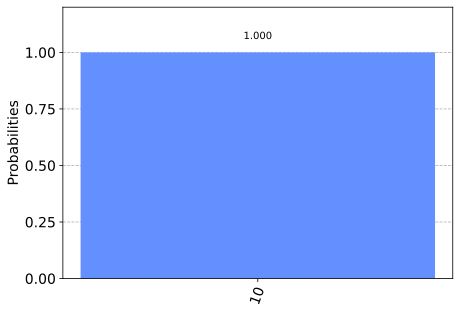

In [13]:
# Execute the half-adder
counts = execute(q_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [14]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}